# Panorama Stitching

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

In [2]:
img1 = cv2.imread('./images/img1.jpeg')
img2 = cv2.imread('./images/img2.jpeg')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

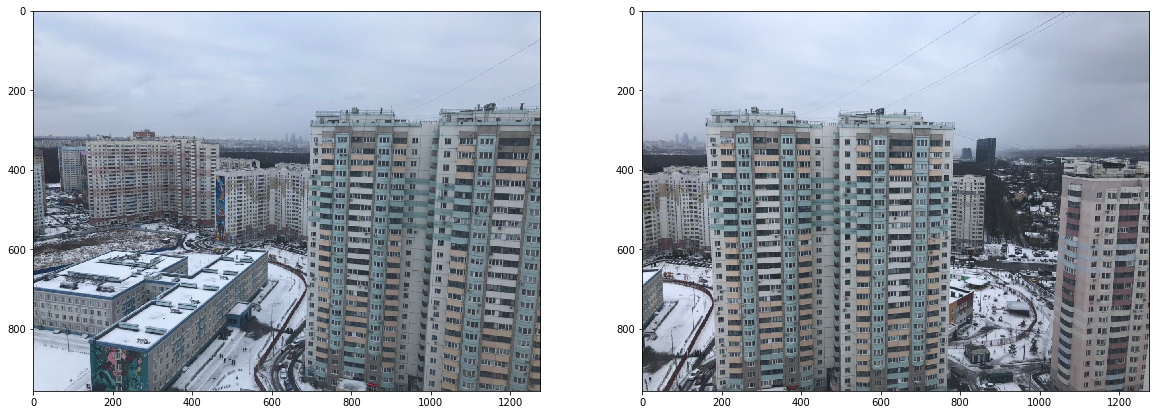

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(img1[:,:,::-1])
ax[1].imshow(img2[:,:,::-1])

## Находим ключевые точки и дескрипторы

In [4]:
sift = cv2.xfeatures2d_SIFT.create()

In [5]:
kp1, dsc1 = sift.detectAndCompute(img1_gray, None)
kp2, dsc2 = sift.detectAndCompute(img2_gray, None)

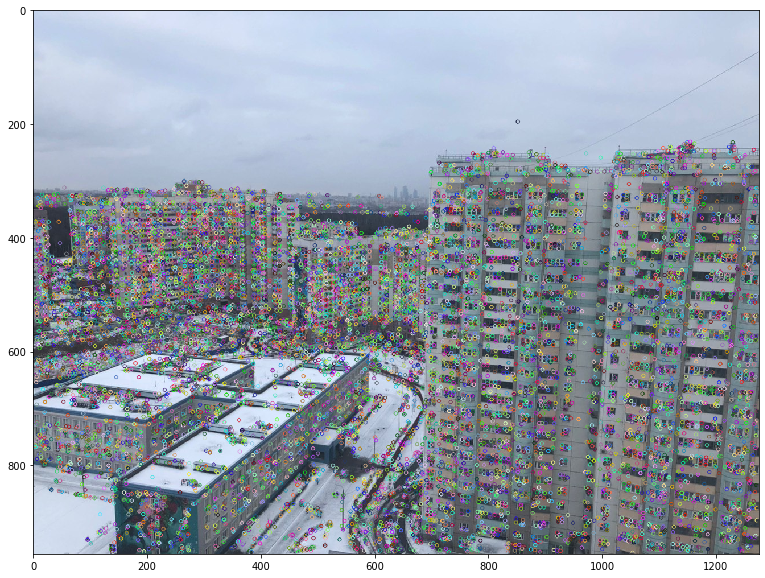

In [6]:
img1_with_kps = cv2.drawKeypoints(img1, kp1, None)

plt.figure(figsize=(20,10))
plt.imshow(img1_with_kps[:,:,::-1])

## Матчим ключевые точки. Убираем плохие матчи.

In [7]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(dsc1, dsc2, k=2)

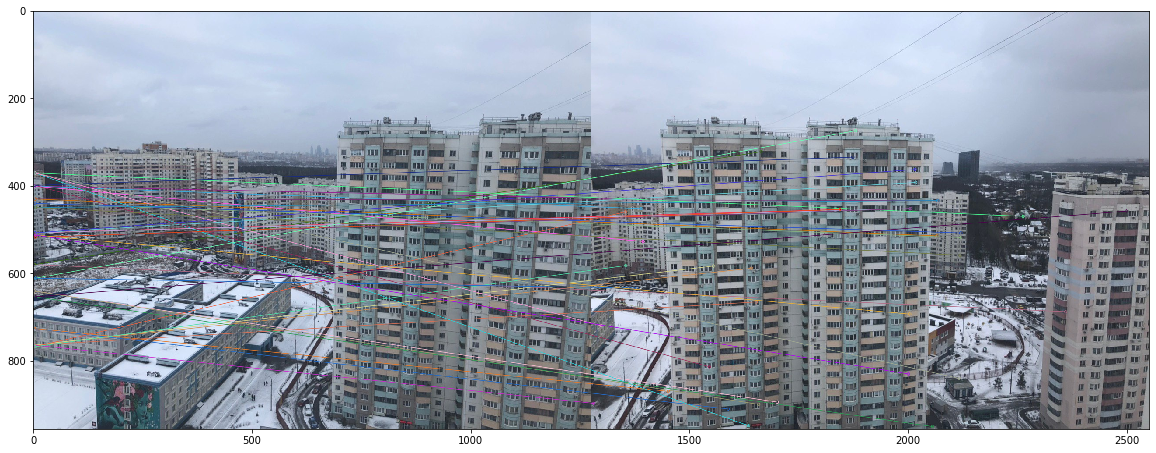

In [8]:
imgs_with_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[:20], None, flags=2)

plt.figure(figsize=(20,10))
plt.imshow(imgs_with_matches[:,:,::-1])

In [9]:
good = []
for m, n in matches:
    if m.distance < .3*n.distance:
        good.append(m)

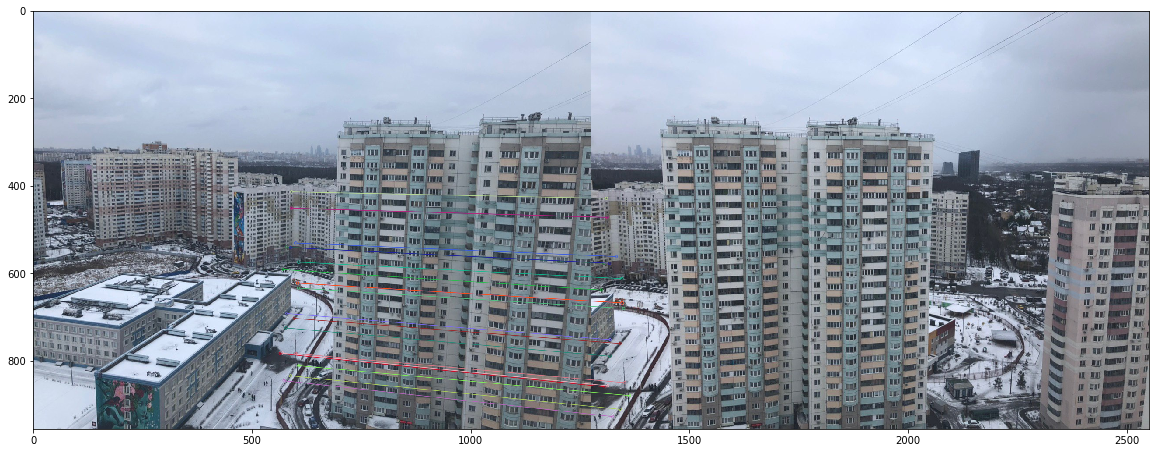

In [10]:
imgs_with_good_matches = cv2.drawMatches(img1, kp1, img2, kp2, good[:20], None, flags=2)

plt.figure(figsize=(20,10))
plt.imshow(imgs_with_good_matches[:,:,::-1])

## Находим projective transform

In [11]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in good])
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good])

In [12]:
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

## Преобразовываем изображения

In [13]:
h, w = img1.shape[0], img1.shape[1]+img2.shape[1]

In [14]:
panorama = cv2.warpPerspective(img2, M, (w,h))

In [15]:
panorama[0:img1.shape[0], 0:img1.shape[1]] = img1

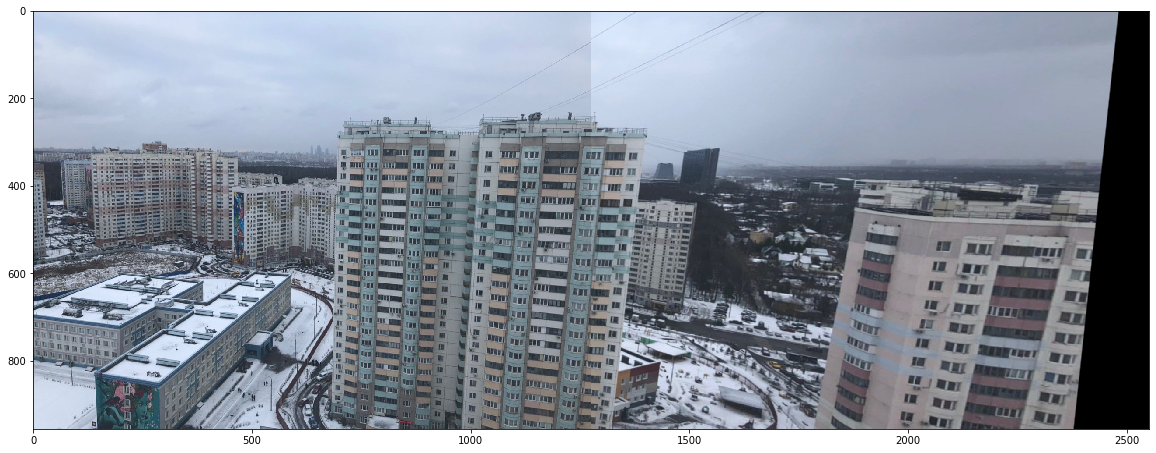

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(panorama[:,:,::-1])